## 1.	Análisis de Datos

### 1.1. Limpieza y preparación de datos  
Tienes un conjunto de datos con las siguientes columnas:
- ID_cliente
- Nombre
- Fecha_de_compra
- Monto_compra
- Producto

Al analizar el dataset, detectas valores nulos, duplicados y algunos registros donde el formato de las fechas no es consistente.
Instrucciones:
Describe el proceso que seguirías para limpiar estos datos utilizando Python o R.
Implementa una función en el lenguaje de tu preferencia que realice las siguientes acciones:
- Eliminar duplicados.
- Corregir el formato de la columna de fecha.
- Eliminar los registros con valores nulos en Monto_compra.


En el caso particular donde se evidencias valores nulos, duplicados y errores en el formato de la fecha antes de proceder a corregir esto se debe validar con el equipo de negocio si las inconsistencias presentadas en el dataset tienen algun tipo de explicación desde los datos. Por ejemplo, puede ser normal que el nombre del usuario puede estar repetido dado que el usuario pudo haber realizado varias compras en el pasado, con lo cual no es recomendable ni pertinente borrar este registro. Para este tipo de escenarios podria ser recomendable crear una llave unica que sea la concatenación de id_cliente + nombre, dado que son identificadores unicos y en este caso se subsana que el nombre del usuario aparezca varias veces. Así mismo, validar que no hayan valores nulos dentro del monto_compra debido a que esto puede reflejar algun error al momento de la obtención de los datos desde la fuente primaria. 

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import sys 
import os

sys.path.append(os.path.abspath(".."))

from src.utils.validation_clean_data import validation_clean_data 

In [4]:
data  = {'id_ciente': ['16272','16262', '16274','14252','16342']
         ,'nombre': ['Juan', 'luis','Maria','Luz', 'Luisa']
         ,'fecha_compra': ['2025-12-05', '2025-11-21', '2025-09-15','2025-10-11','2025/11/11']
         ,'monto_compra': [20200, None, 15699, 10001, 10001]
         ,'producto': ['XB1', 'XB1', 'XB2', 'XB3','XB']
         }
data = pd.DataFrame(data=data)

In [5]:
df_limpio, resumen = validation_clean_data(data, column_date=['fecha_compra'], format_date='%Y-%m-%d')
print(resumen)
df_limpio

{'duplicados_en_columnas_eliminados': {'monto_compra': 1, 'producto': 1}, 'filas_duplicadas_eliminadas': 0, 'valores_nulos_eliminados': 3, 'errores_formato_fecha': {}}


,id_ciente,nombre,fecha_compra,monto_compra,producto
0,16272,Juan,2025-12-05,20200.0,XB1
2,16274,Maria,2025-09-15,15699.0,XB2
3,14252,Luz,2025-10-11,10001.0,XB3


## 1.2. Análisis descriptivo de datos 
Tienes los siguientes datos de ventas:
- Ventas_por_mes: [200, 150, 180, 220, 210, 190, 230, 220, 240, 230, 210, 250]
Instrucciones:
    - Calcula el promedio, la mediana y la desviación estándar de las ventas.
    - Realiza una visualización en la que compares las ventas mensuales con el promedio general.


In [8]:
ventas = {'ventas_mes': [200, 150, 180, 220, 210, 190, 230, 220, 240, 230, 210, 250]
          ,"mes": ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']}
ventas = pd.DataFrame(ventas)

In [7]:
print(f"Promedio en ventas: {np.mean(ventas).item():.3f} \n "
      f"Mediana en ventas: {np.median(ventas).item():.3f} \n "
      f"Desviación estándar en ventas: {np.std(ventas).item():.3f}"
)

Promedio en ventas: 210.833 
 Mediana en ventas: 215.000 
 Desviación estándar en ventas: 26.601


/Users/santiagovasquezr/Documents/datecsa/.venv/lib/python3.13/site-packages/numpy/_core/fromnumeric.py:4061: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


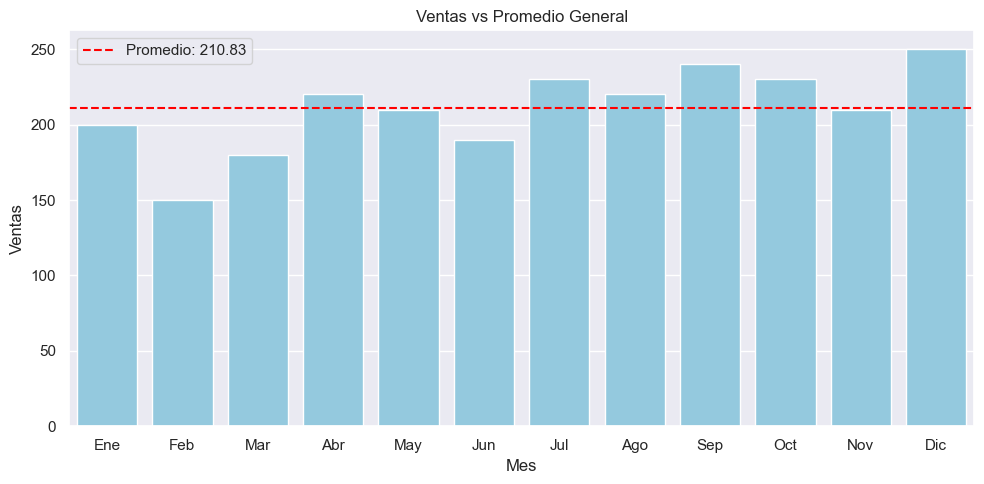

In [15]:
# Calcular promedio general
promedio_general = ventas['ventas_mes'].mean()

# Visualización
plt.figure(figsize=(10,5))
sns.barplot(data=ventas, x='mes', y='ventas_mes', color='skyblue')
plt.axhline(promedio_general, color='red', linestyle='--', label=f'Promedio: {promedio_general:.2f}')
plt.title('Ventas vs Promedio General')
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.legend()
plt.tight_layout()
plt.show()